In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import chromATAC as ca
from chromATAC.integrated import IntData
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from tqdm import tqdm
import warnings
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy
import h5py

warnings.simplefilter("ignore", category=pd.errors.ParserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [121]:
tes_dir = '/Users/mossishahi/Code/lupien/IntData/data/V2-TEs/non_olap'
cotes_dir = '/Users/mossishahi/Code/lupien/IntData/data/V2-TEs/non_olap/cores1000/'

In [122]:
TEs = np.array([i.split('.')[0] for i in os.listdir(tes_dir) if i.endswith('.bed')])
COTEs = np.array([i.split('.')[0] for i in os.listdir(cotes_dir) if i.endswith('.bed')])

In [123]:
te_meta = pd.read_csv('/Users/mossishahi/Code/lupien/IntData/analysis/data/repeat_metadata.onlyTEs_full.tsv', sep='\t')
te_df = te_meta.iloc[np.concatenate([np.where(te_meta['repname_numbered'].apply(lambda x: i.split('_')[0]==x.split('_')[0]))[0] for i in TEs]), :].loc[:, ['repname', 'Superfamily', 'repname_numbered']].copy()
te_df.index = range(1, len(te_df)+1)
te_df['COTE'] = te_df['repname_numbered'].apply(lambda x: x.split('_')[0] in np.array([i.split('_')[0] for i in np.intersect1d(TEs, COTEs)]))
te_df.loc[971] = ['ERV3-16A3_I-int', 'ERVL', '369_ERV3-16A3_I-int', True]

In [124]:
te_n_elements = pd.read_csv(tes_dir+'/n_elements_per_TE.tsv', sep='\t', header=None, names = ['name', 'n_elements'])
cote_n_elments = pd.read_csv(cotes_dir+'/n_clusters_per_TE.tsv', sep='\t', header=None, names = ['name', 'n_clusters'])

In [125]:
te_n_elements['name'] = te_n_elements['name'].apply(lambda x: x.split('_Merged.bed')[0])
cote_n_elments['name'] = cote_n_elments['name'].apply(lambda x: x.split('_Merged.bed')[0])
te_df = te_df.merge(te_n_elements, how='left', left_on='repname_numbered', right_on='name').merge(cote_n_elments, how='left', left_on='repname_numbered', right_on='name').drop(['name_x', 'name_y'], axis=1).fillna(0)
te_df.set_index('repname_numbered', inplace=True)

In [126]:
def print_structure(name, obj):
    print(name)
    if isinstance(obj, h5py.Dataset):
        # You can add more details here if you want
        print(f"Dataset with shape: {obj.shape} and dtype: {obj.dtype}")

In [127]:
file = '/Users/mossishahi/Code/lupien/IntData/analysis/experiment16/gain/chr17__hit_spcf.h5'

with h5py.File(file, 'r') as file:
    data = file['array'][...]  # Replace 'dataset_name' with your dataset name

In [128]:
df = pd.read_csv('/Users/mossishahi/Code/lupien/IntData/analysis/experiment16/gain/chr17__n_hits.csv')
df = df.rename({'Unnamed: 0':'CoTE'}, axis=1)
df = df.set_index('CoTE')

In [129]:
np.where(['BRCA' in i for i in df.columns])[0].item()

14

In [130]:
np.where(['LTR56' in i for i in df.index])[0].item()

433

<Axes: >

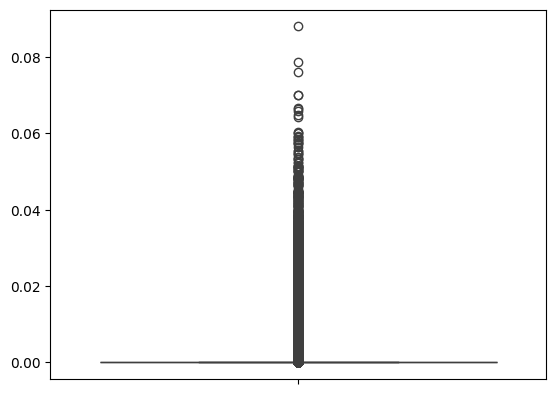

In [136]:
sns.boxplot(data.flatten())

In [137]:
data.flatten().max()

0.08796746912378606

In [133]:
data.shape

(453, 33, 84)

<Axes: >

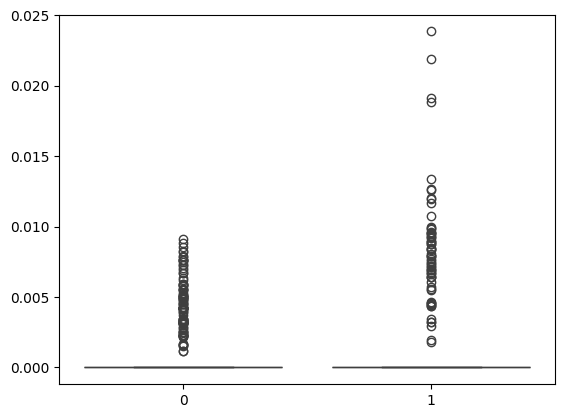

In [152]:
sns.boxplot(pd.DataFrame(np.vstack([data[1, :, :].flatten().T, data[2, :, :].flatten()]).T))

<Axes: >

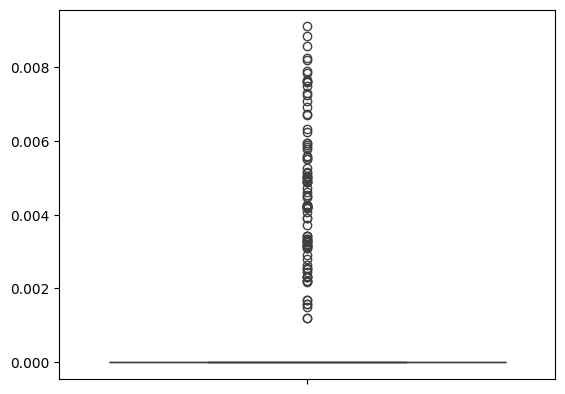

In [141]:
sns.boxplot()

/Users/mossishahi/miniconda3/envs/shirin/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/mossishahi/miniconda3/envs/shirin/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


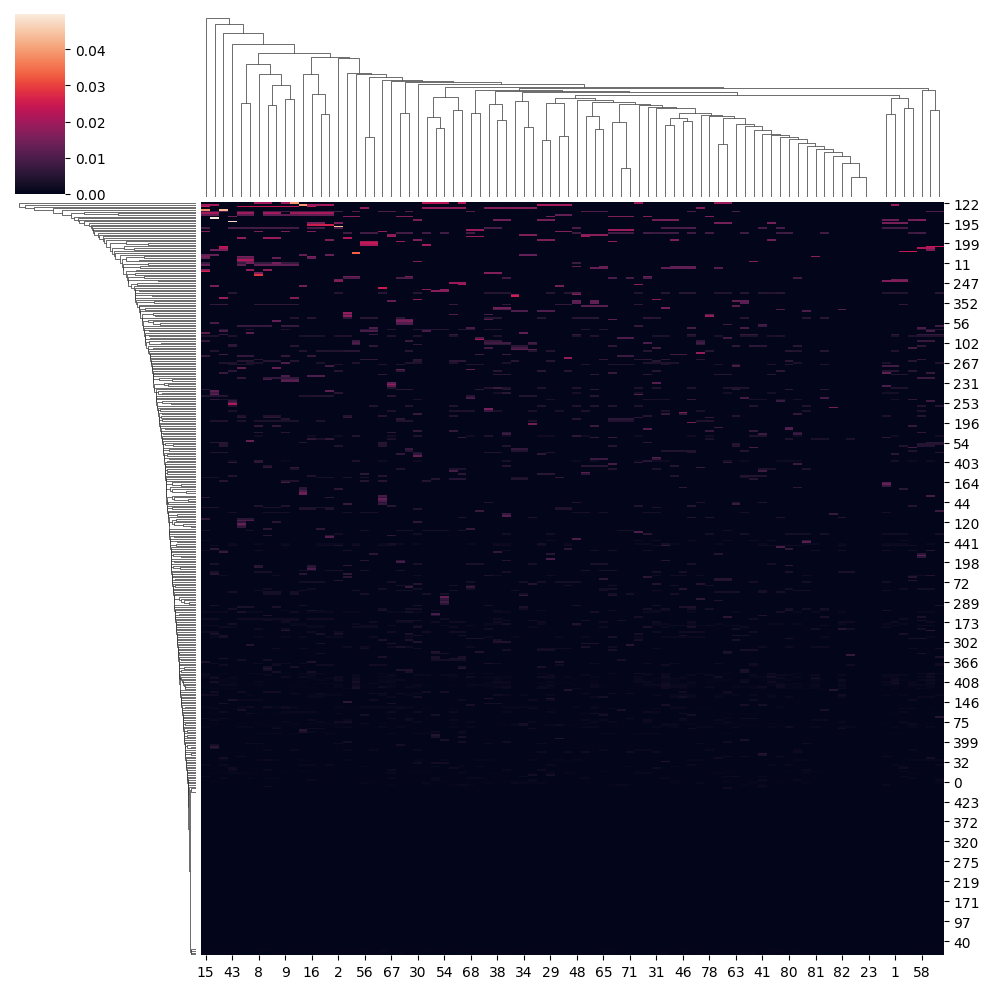

In [154]:
sns.clustermap(data[:, 0, :])

In [156]:
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(data[:, 0, :], method='average')
col_linkage = hierarchy.linkage(data[:, 0, :].T, method='average')
row_order = hierarchy.leaves_list(row_linkage)
col_order = hierarchy.leaves_list(col_linkage)


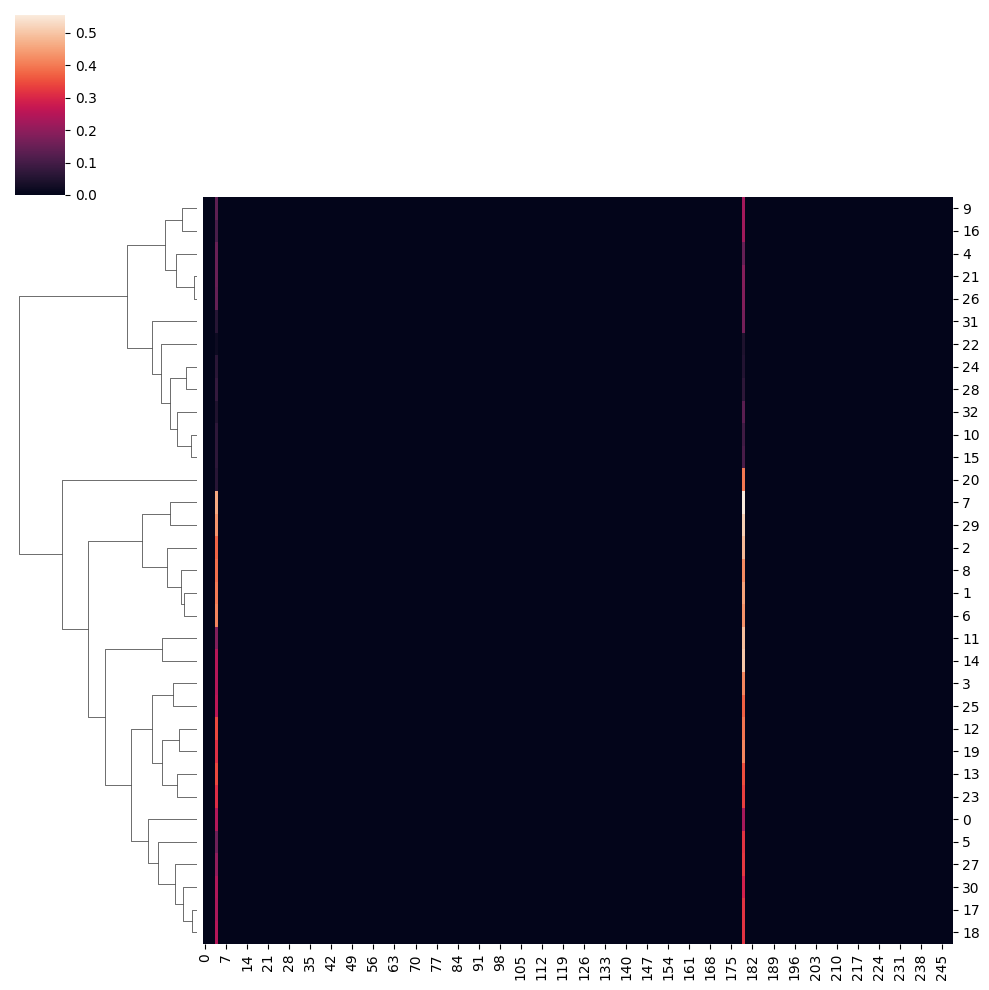

In [81]:
sns.clustermap(pd.DataFrame(dataset_value[0, :, :]), col_cluster=False)

In [176]:
np.where(data[:, 0, :]>0.03)

(array([ 95, 113, 115, 115, 122, 139, 179, 264]),
 array([19, 20, 15, 60, 10,  2, 75, 43]))

<Axes: >

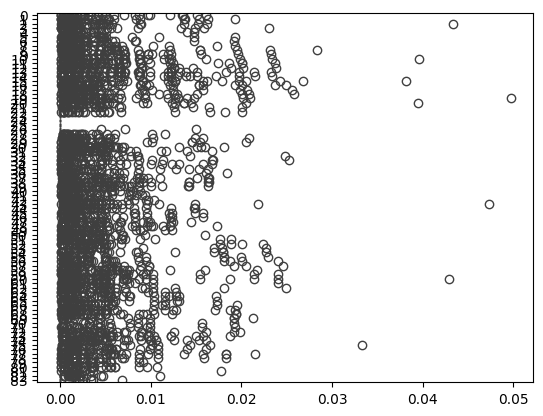

In [175]:
sns.boxplot(data[:, 0, :], orient='h')

In [179]:
df.iloc[np.where(data[:, 0, :]>0.03)[0], 0]

CoTE
COTEs;COTEs>576_L1MDb       0.114392
COTEs;COTEs>130_AluYk4      0.553236
COTEs;COTEs>773_LTR39       0.186609
COTEs;COTEs>773_LTR39       0.186609
COTEs;COTEs>873_LTR89       0.571730
COTEs;COTEs>934_MER113      0.099804
COTEs;COTEs>324_Cheshire    0.076424
COTEs;COTEs>1127_MER96B     0.108774
Name: CNVAR;Cancertype:GBM, dtype: float64

<Axes: >

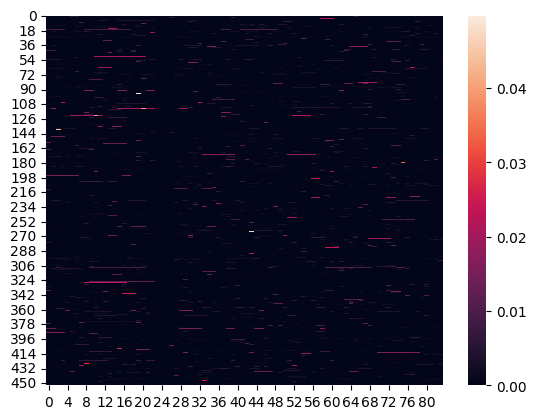

In [177]:
sns.heatmap(data[:, 0, :])

In [164]:
data.shape

(453, 33, 84)

In [69]:
df

,CNVAR;Cancertype:GBM,CNVAR;Cancertype:OV,CNVAR;Cancertype:LUAD,CNVAR;Cancertype:LUSC,CNVAR;Cancertype:PRAD,CNVAR;Cancertype:UCEC,CNVAR;Cancertype:BLCA,CNVAR;Cancertype:TGCT,CNVAR;Cancertype:ESCA,CNVAR;Cancertype:PAAD,...,CNVAR;Cancertype:HNSC,CNVAR;Cancertype:LAML,CNVAR;Cancertype:READ,CNVAR;Cancertype:LGG,CNVAR;Cancertype:DLBC,CNVAR;Cancertype:KICH,CNVAR;Cancertype:UCS,CNVAR;Cancertype:ACC,CNVAR;Cancertype:PCPG,CNVAR;Cancertype:UVM
CoTE,,,,,,,,,,,,,,,,,,,,,
COTEs;COTEs>1363_THE1B-int,0.080061,0.132853,0.054912,0.110901,0.025304,0.028916,0.043538,0.011163,0.065956,0.139983,...,0.044706,0.000000,0.088065,0.247042,0.092095,0.618756,0.045415,0.057060,0.415842,0.151921
COTEs;COTEs>1229_Penelope1_Vert,0.010676,0.049124,0.001807,0.011089,0.011438,0.003510,0.013919,0.000000,0.025130,0.015241,...,0.007145,0.004941,0.017833,0.014579,0.099125,0.310836,0.000000,0.010103,0.063181,0.011809
COTEs;COTEs>577_L1MD,0.282071,0.572268,0.466975,0.952093,0.314127,0.148149,0.347748,0.085840,0.534633,1.129328,...,0.343362,0.004595,0.687656,2.135962,0.618088,5.345667,0.186185,0.444917,4.143446,1.361073
COTEs;COTEs>587_L1ME3E,0.312578,0.973332,0.940007,1.755216,0.466834,0.253192,0.498180,0.125263,0.927176,2.053746,...,0.636809,0.019202,1.102645,3.757008,0.935168,6.339161,0.294449,0.618306,7.235397,2.379933
COTEs;COTEs>546_L1MA4,0.185709,0.524916,0.457074,0.938431,0.517697,0.099931,0.432916,0.069667,0.794463,0.898958,...,0.431778,0.004684,0.690907,1.688352,0.592341,7.898830,0.226268,0.397589,3.717390,1.016376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COTEs;COTEs>691_LTR16A1,0.050295,0.193069,0.116410,0.213189,0.056365,0.047590,0.059156,0.017154,0.095045,0.263978,...,0.074246,0.000000,0.156487,0.471594,0.037363,0.640896,0.061762,0.066634,0.862948,0.301819
COTEs;COTEs>131_AluYm1,0.478264,1.210348,0.565337,1.214766,0.458172,0.267441,0.424479,0.128292,0.645203,1.707931,...,0.425757,0.014053,1.029941,2.619282,0.923020,5.558582,0.299802,0.496509,4.633922,1.707386
COTEs;COTEs>958_MER21-int,0.098801,0.269700,0.231925,0.409049,0.121750,0.064483,0.132530,0.039570,0.215464,0.523463,...,0.137772,0.000000,0.278885,0.920332,0.183369,1.562396,0.106592,0.158234,1.740135,0.599586
